## Introduction

### **Problem Statement**

> Modelling house prices based on other factors

### **Success Metrics**

    1. Accuracy score of above 80%
    2. Least possible RMSE value
    3. Identifying the best Model

### **Understanding the context**

Hass Consulting Company is a real estate leader with over 25 years of experience. The company wishes to understand the factors that affect the price of a house and to further build a model to predict the price of a house given a set of the predictor variables.

### **Recording the Experimental Design**

* Read and explore the given dataset.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis. This will be done using the following regression techniques:

    1. Linear Regression
    2. Quantile Regression
    3. Ridge Regression
    4. Lasso Regression
    5. Elastic Net Regression
* Check for multicollinearity
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Provide a recommendation based on your analysis.
* Challenge the solution by providing insights on how you can make improvements in model improvement.

### **Data Relevance**

The data contains much of the factors that are considered when purchasing a house. Worth noting is that each of these features comes at a cost. For example extra room implies extra cost and so on.

## Loading Libraries and Data

In [99]:
# Importing the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.style as style
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error

In [21]:
# Loading the Dataset
df = pd.read_csv('house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
# Previewing the tail of the data
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [23]:
# Data Size
print('Rows: ', df.shape[0])
print('Columns: ', df.shape[1])

Rows:  21613
Columns:  20


In [24]:
# Confirming the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

* The **id** column is not useful in this analysis
* There are no missing values in this data
* **price** column has our depedent variable that we wish to determine factors that affect it and to further create a model that predicts it based on the remaining fetures
* In so much as the following columns are numeric **bedroom, bathrooms, floors, waterfront, year_built** and  **zip_code** represent nominal values

In [25]:
# Identifying variables with integer datatype
df.dtypes[df.dtypes == 'int64']

id               int64
bedrooms         int64
sqft_living      int64
sqft_lot         int64
waterfront       int64
view             int64
condition        int64
grade            int64
sqft_above       int64
sqft_basement    int64
yr_built         int64
yr_renovated     int64
zipcode          int64
sqft_living15    int64
sqft_lot15       int64
dtype: object

In [26]:
# Dropping the 'id' column
df = df.drop(['id'], axis=1)

In [27]:
# Previewing the Data
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6716,640000.0,3,1.5,1960,4080,1.5,0,0,3,7,1960,0,1915,0,98115,47.6768,-122.310,1880,4080
4857,320000.0,4,2.5,2190,7125,2.0,0,0,5,8,2190,0,1978,0,98032,47.3709,-122.285,2190,8075
12491,377500.0,4,2.5,2640,10720,2.0,0,0,3,8,2640,0,1999,0,98188,47.4485,-122.278,1680,10018
10275,597157.0,7,4.0,2690,10880,1.0,0,0,4,8,2690,0,1960,0,98033,47.6787,-122.168,1840,10836
12290,374950.0,4,2.5,2790,4650,2.0,0,0,3,8,2790,0,2004,0,98038,47.3557,-122.026,2850,4650


In [28]:
# Numeric Features Description
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [29]:
# Checking for duplicates
df.duplicated().any()

True

In [30]:
# Dropping the Duplicates
df = df.drop_duplicates()
df.duplicated().any()

False

## Exploratory Data Analysis

In [31]:
# Exploring the TARGET variable
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(16,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 )

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


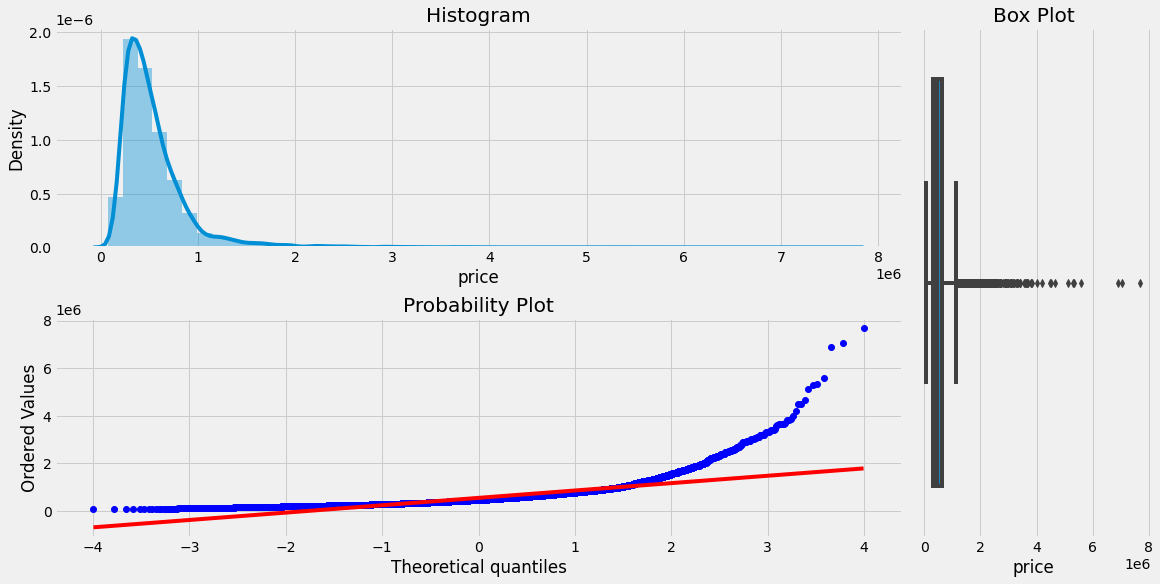

In [32]:
plotting_3_chart(df, 'price')

* Our target variable, SalePrice is **not normally distributed.**
* Our target variable is right-skewed.
* There are multiple outliers in the variable.


In [33]:
# Skewness and Kurtosis
print("Skewness: " + str(df['price'].skew()))
print("Kurtosis: " + str(df['price'].kurt()))

Skewness: 4.021354631513139
Kurtosis: 34.51538421151693


Transforming the Target Variable

In [34]:
# ## Plotting the newly transformed response variable
# df['price'] = np.log1p(df['price'])
# plotting_3_chart(df, df['price'])

In [63]:
# Creating a Transformed Variable. Natural Log Transformation
df['price_log'] = np.log1p(df.price.values)

In [67]:
# # Plotting the transformed variable
# plotting_3_chart(df, df['price_log'].dropna())

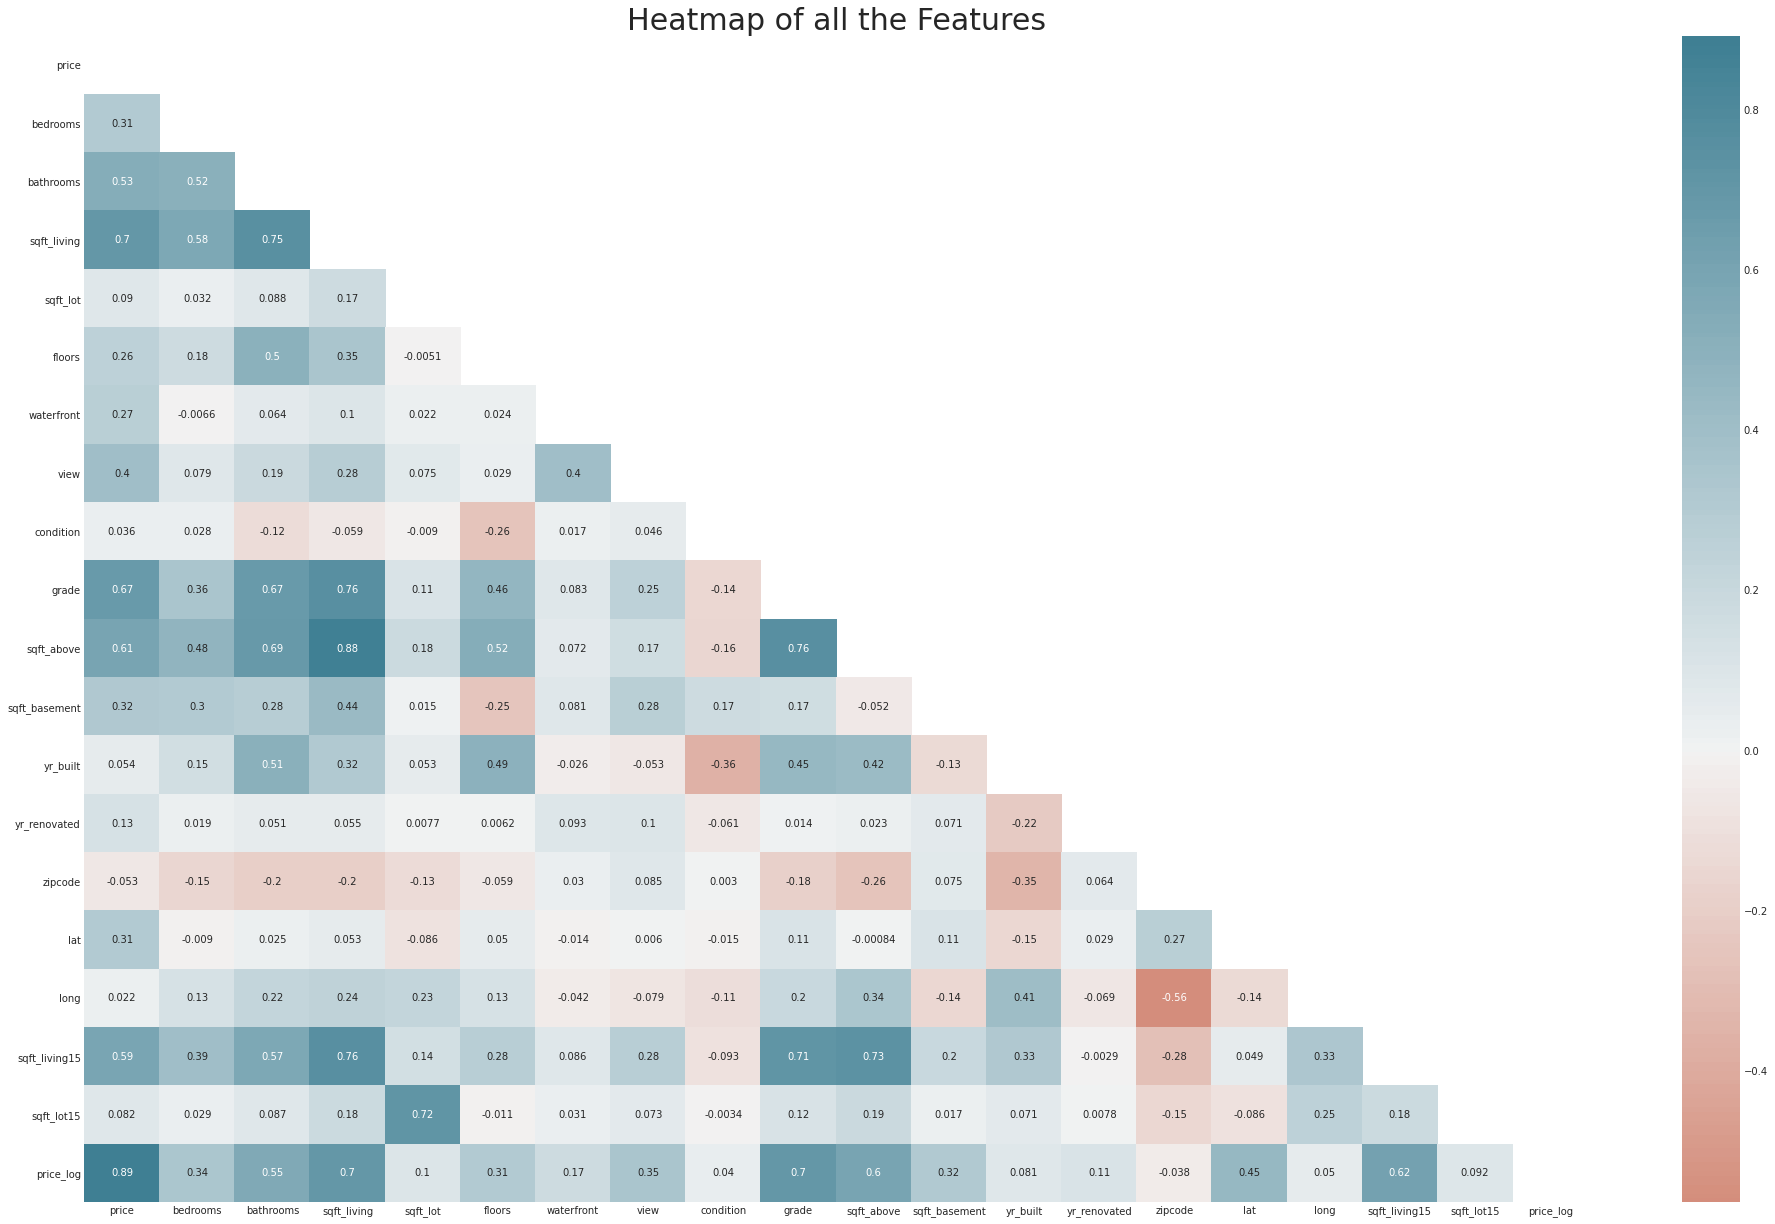

In [69]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           )
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

**Observation**

There is  multicollinearity in various features. 
* There is 76% correlation between sqft_living and sqft_living
* There is 72

If I were using only multiple linear regression, I would be deleting these features from the dataset to fit better multiple linear regression algorithms. However, we will be using many algorithms as scikit learn modules makes it easy to implement them and get the best possible outcome. Therefore, we will keep all the features for now.

In [35]:
# Bivariate analysis. Evaluating the relationship strenths for the features and the target variables
# Getting the correlation of all the features with target variable. 
(df.corr()**2)["price"].sort_values(ascending = False)[1:]

sqft_living      0.492866
grade            0.445649
sqft_above       0.366699
sqft_living15    0.342661
bathrooms        0.275775
view             0.157976
sqft_basement    0.104886
bedrooms         0.095058
lat              0.094198
waterfront       0.070933
floors           0.065990
yr_renovated     0.016002
sqft_lot         0.008037
sqft_lot15       0.006797
yr_built         0.002919
zipcode          0.002824
condition        0.001323
long             0.000464
Name: price, dtype: float64

In [36]:
# Residual plot function
def residual_plot(y, x):
  plt.subplots(figsize = (12,8))
  sns.residplot(x, y)

In [37]:
def customized_scatterplot(y, x):
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x)
    sns.regplot(y=y, x=x)

In [38]:
# Boxplot function
def customized_boxplot(y, x):
  style.use('seaborn-deep')
  plt.subplots(figsize=(12, 8))
  sns.boxplot(y=y, x=x)

#### Price vs sqft_living

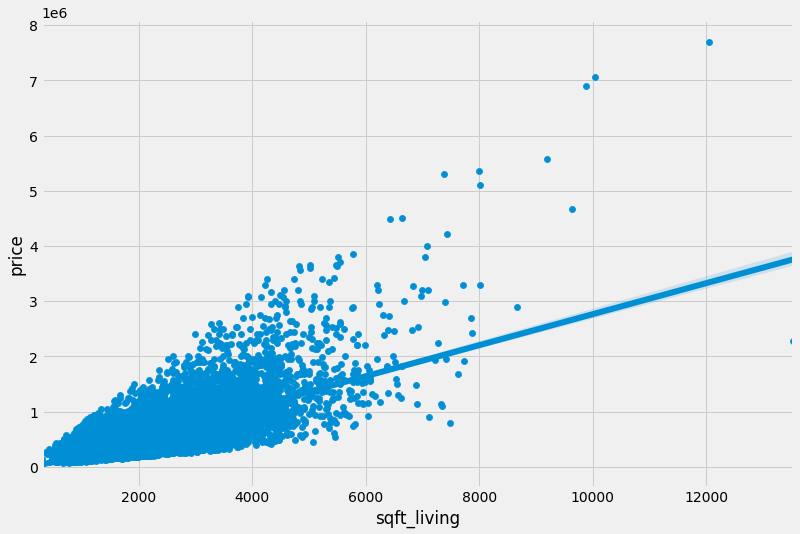

In [39]:
customized_scatterplot(df.price, df.sqft_living)

Plotting the Residual Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


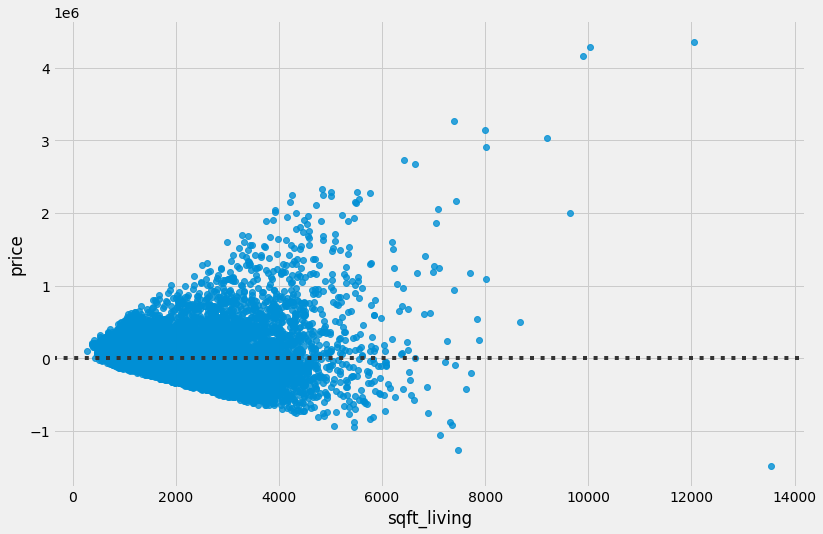

In [40]:
residual_plot(df.price, df.sqft_living)

#### Price vs grade

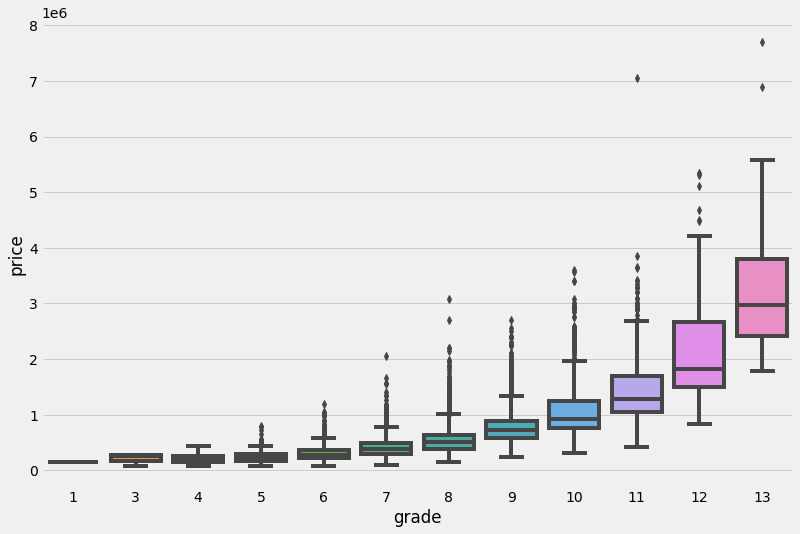

In [41]:
customized_boxplot(df.price, df.grade)

* **Grade** is a categorical variable
* Scatter plot is not the best way to visualize categorical variables. 
* The boxplot result indicates an apparent relationship between the two features. 
* The **average price** of the houses increases with the increase in house **grade**
* Additionally, in each house grade there are outliers of houses with overly high prices

#### Price vs sqft_above

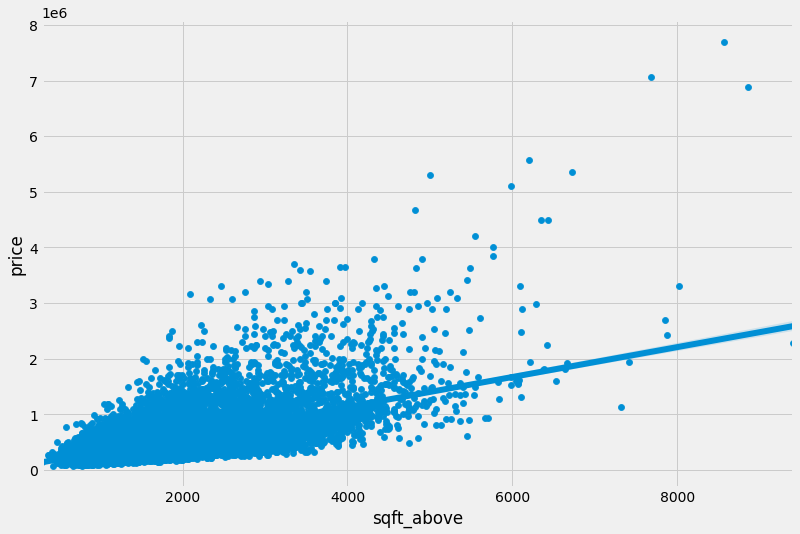

In [42]:
customized_scatterplot(df.price, df.sqft_above)

Plotting the Residual Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


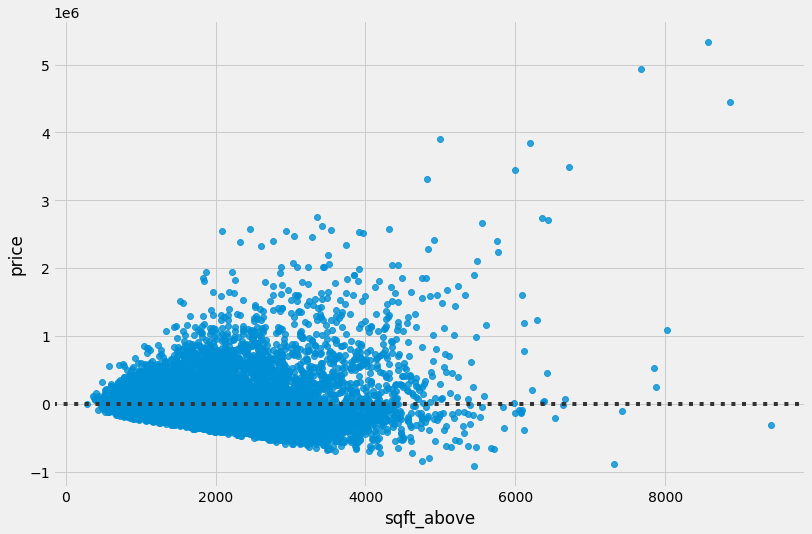

In [43]:
residual_plot(df.price, df.sqft_above)

#### Price vs sqft_living15

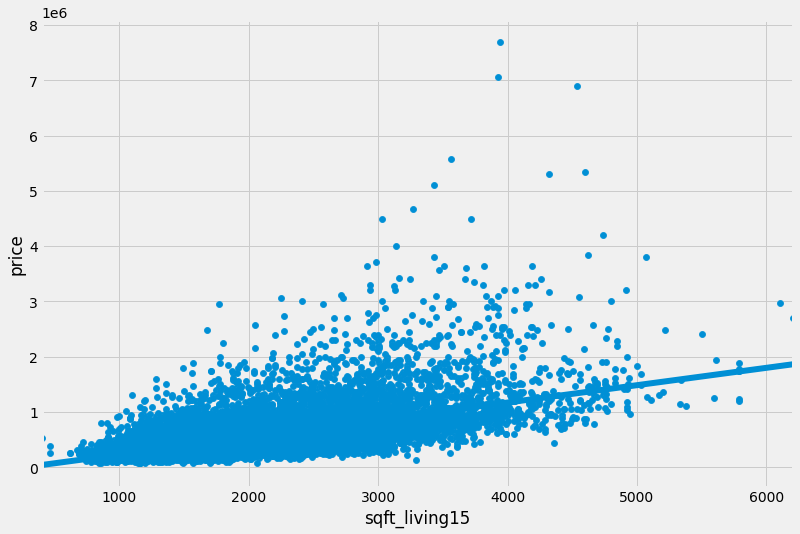

In [44]:
customized_scatterplot(df.price, df.sqft_living15)

Residual Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


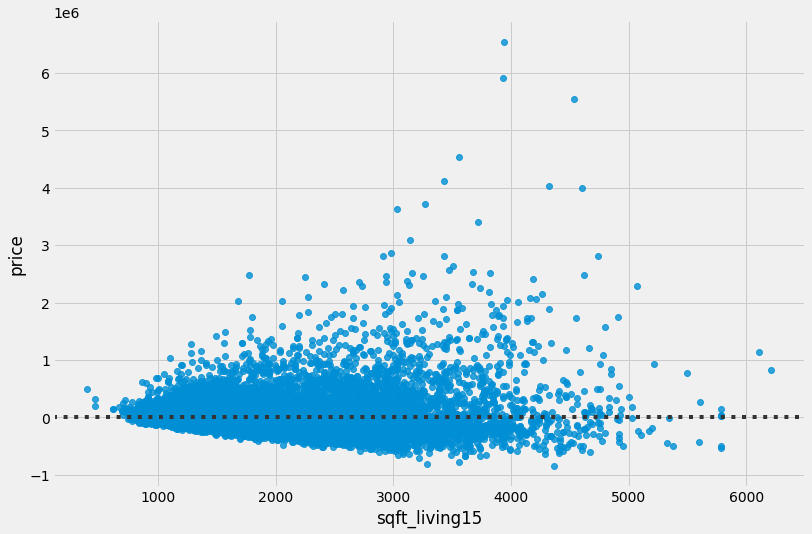

In [45]:
residual_plot(df.price, df.sqft_living15)

#### Price vs Bathrooms

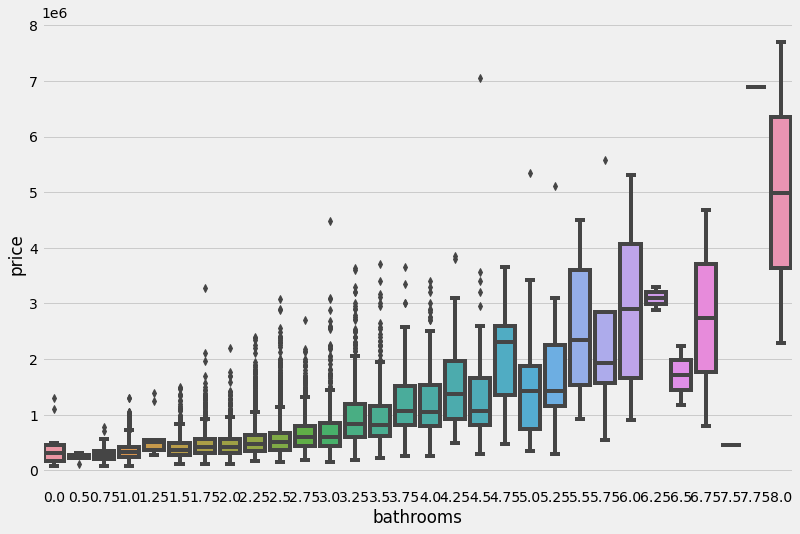

In [46]:
customized_boxplot(df.price, df.bathrooms)

* There is a general increase in the **average price** of a house with increase in the **number of bathrooms**
* Outliers are also observed in each of the categories

#### Price vs View

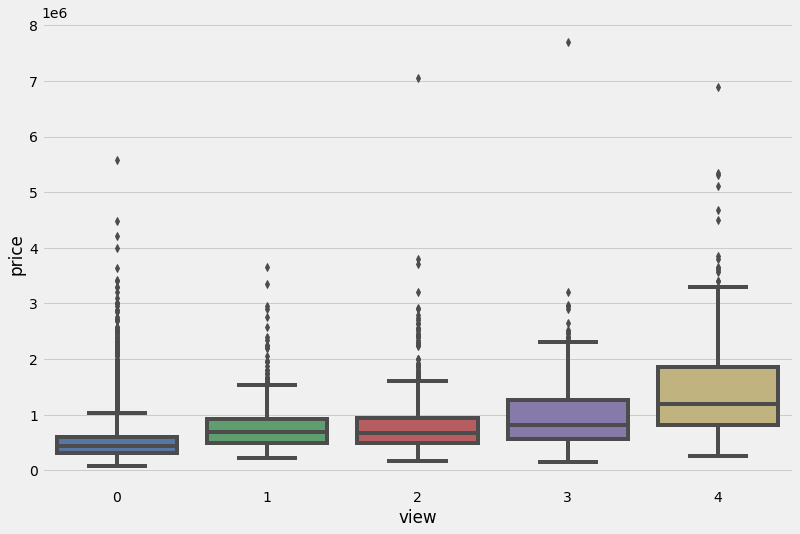

In [47]:
customized_boxplot(df.price, df.view)

* The average price of a house is changes with change in view offered by the house

#### Price vs sqft_basement

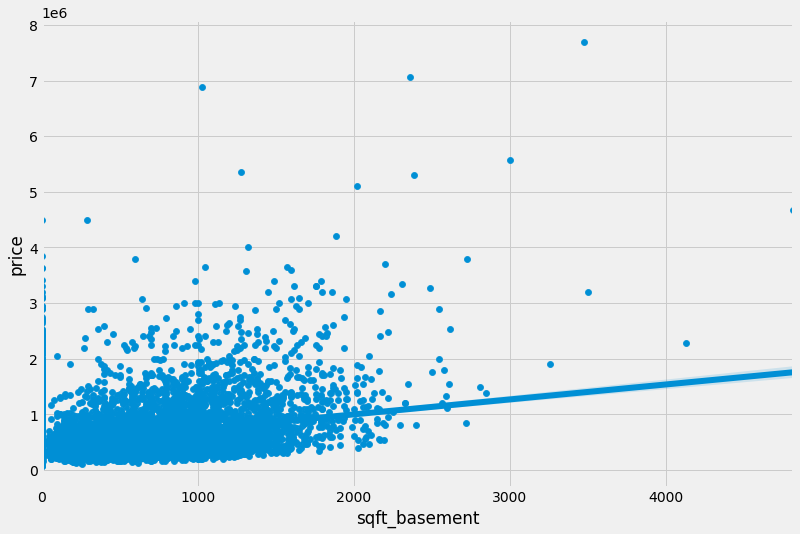

In [48]:
customized_scatterplot(df.price, df.sqft_basement)

Residual Plots

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


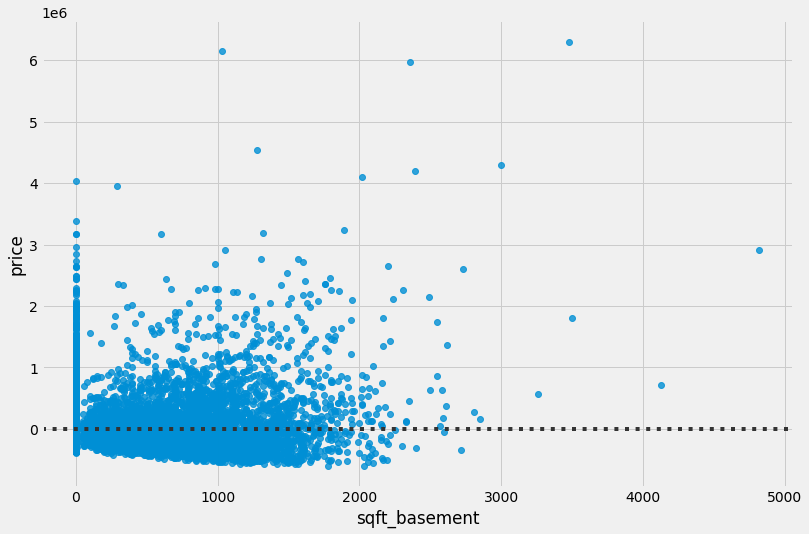

In [49]:
residual_plot(df.price, df.sqft_basement)

#### Price vs Bedrooms

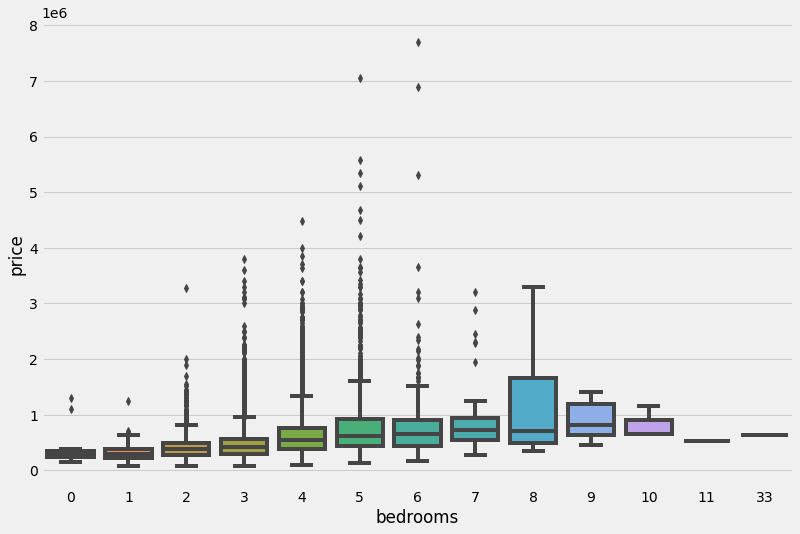

In [50]:
customized_boxplot(df.price, df.bedrooms)

* Generally it is observed that the **average price** of a house increases with increase in the **number of bedrooms**
* Outliers are also noted where the price are exceptionally high as compared to houses with the same number of bedroom

#### Price vs lat

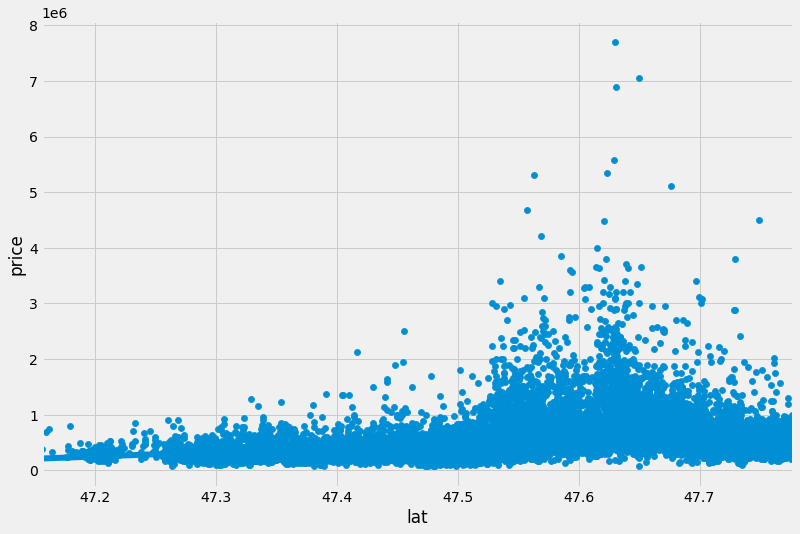

In [51]:
customized_scatterplot(df.price, df.lat)

* There is no linear relationship between the price of a house and its latitude
* However, it is observed that there is a latitude regions when houses are generally highly priced. This could be contributed to by a number of other factors such as presence of controlled development and so on

#### Price vs Waterfront

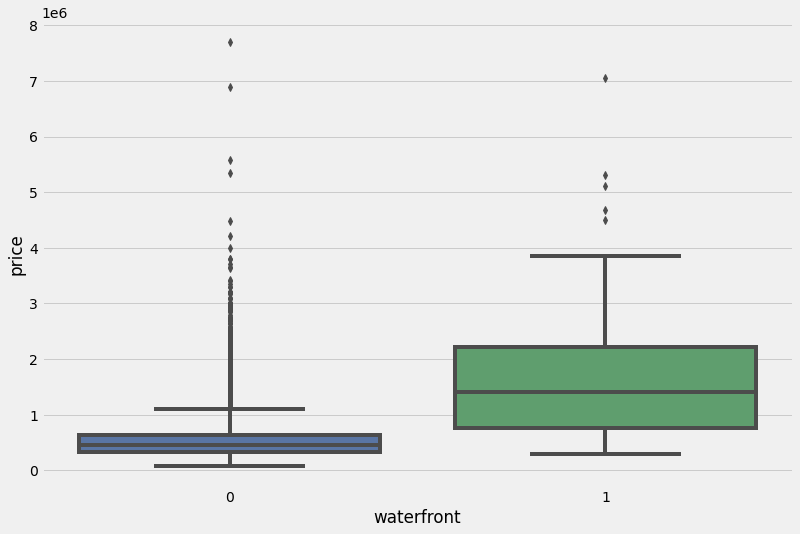

In [52]:
customized_boxplot(df.price, df.waterfront)

Note:

    0 - No Waterfront
    1 - Waterfront Present

* Houses at the Waterfront generally are highly priced.

#### Price vs Floors

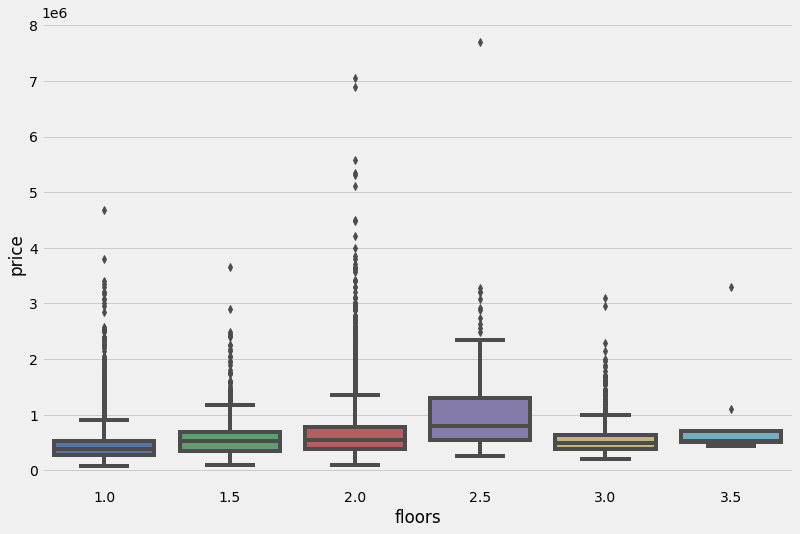

In [53]:
customized_boxplot(df.price, df.floors)

* Generally, the more the floor the higher the average price upto 2.5 floor
* However, houses with 2.5 floors fetches on average the highest prices

#### Year Renovated

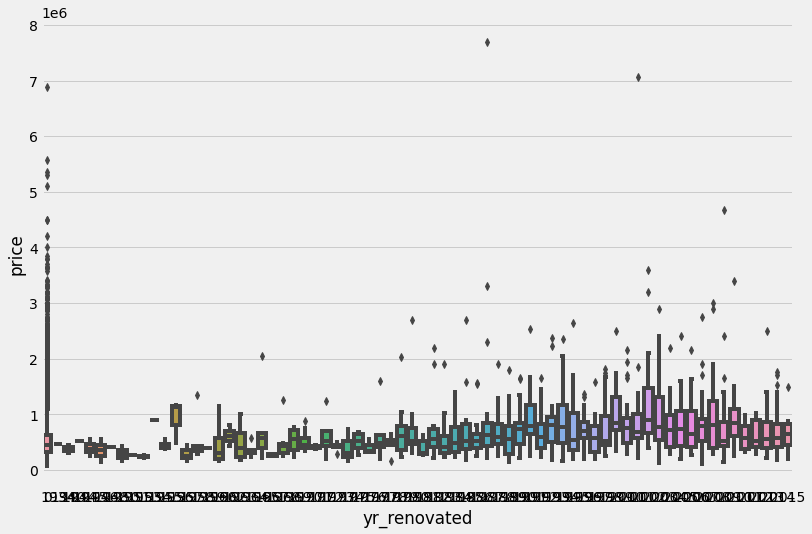

In [54]:
customized_boxplot(df.price, df.yr_renovated)

* There is no obvious relationship between the price of the house and the year of renovation

#### Price vs sqft_lot

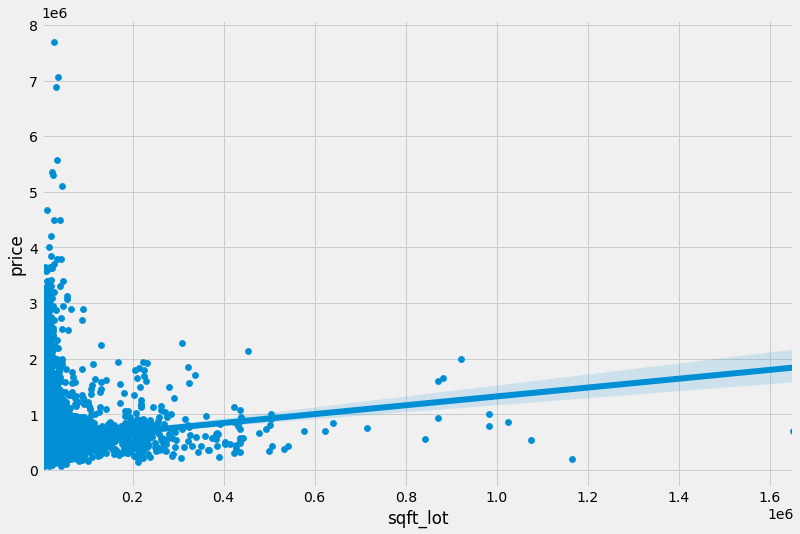

In [55]:
customized_scatterplot(df.price, df.sqft_lot)

Residual Plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


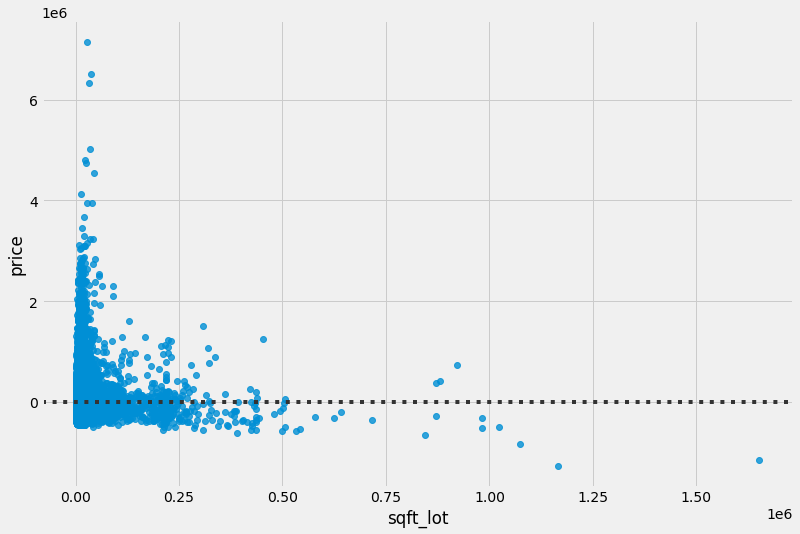

In [56]:
residual_plot(df.price, df.sqft_lot)

#### Price vs sqft_lot15

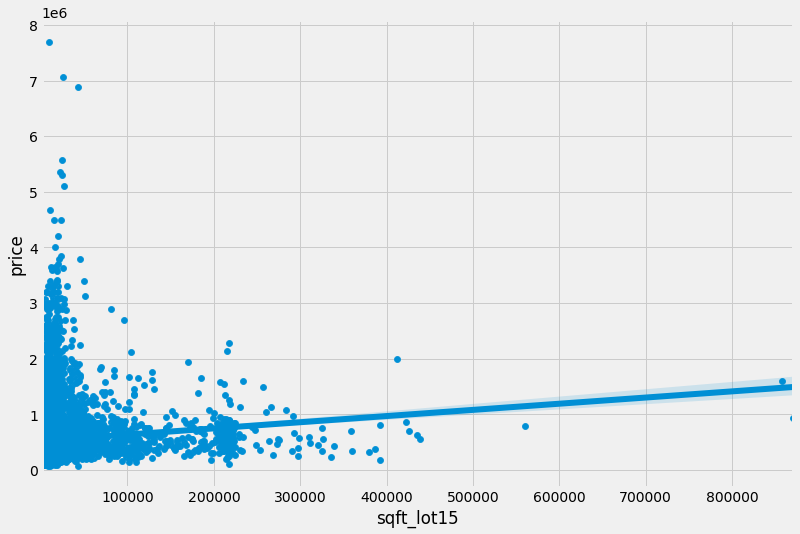

In [57]:
customized_scatterplot(df.price, df.sqft_lot15)

#### Price vs yr_built

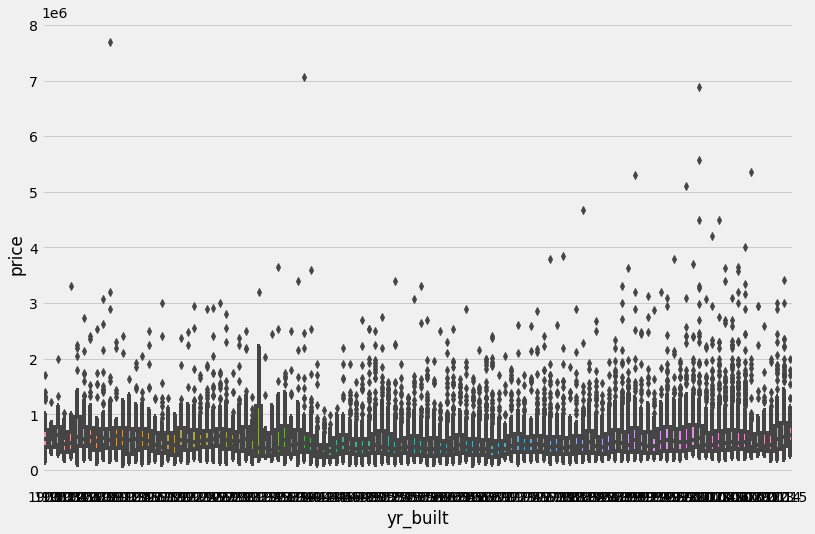

In [58]:
customized_boxplot(df.price, df.yr_built)

* There is no apparent relationship between the the prices of the houses and the year in which the house was built.

#### Price vs zipcode

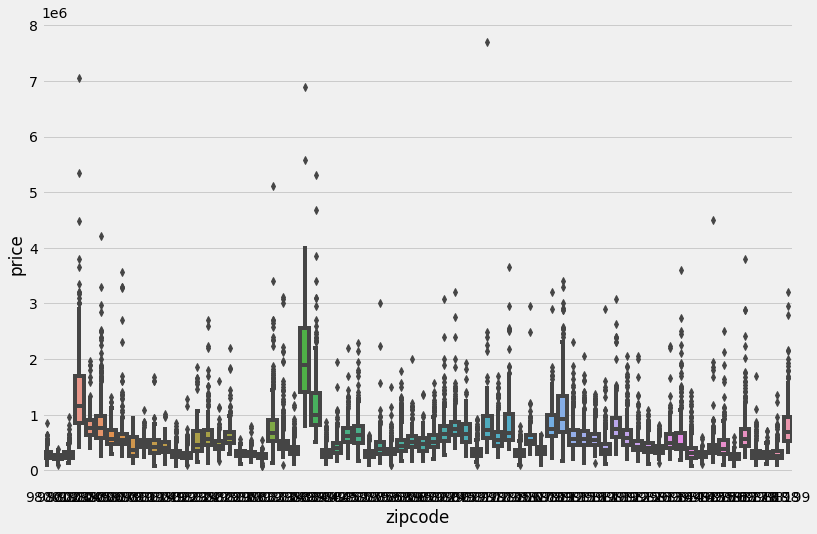

In [59]:
customized_boxplot(df.price, df.zipcode)

* * There is no apparent relationship between the the prices of the houses and the zipcode.

#### Price vs Condition

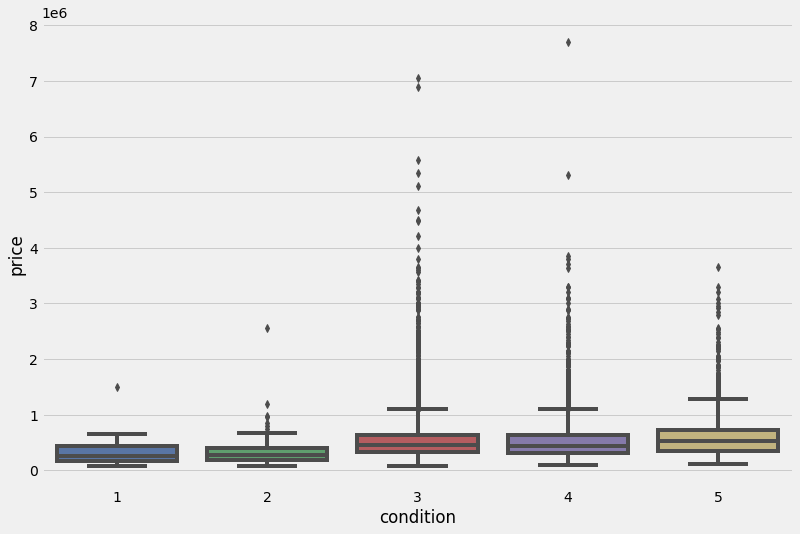

In [60]:
customized_boxplot(df.price, df.condition)

#### Price vs Long

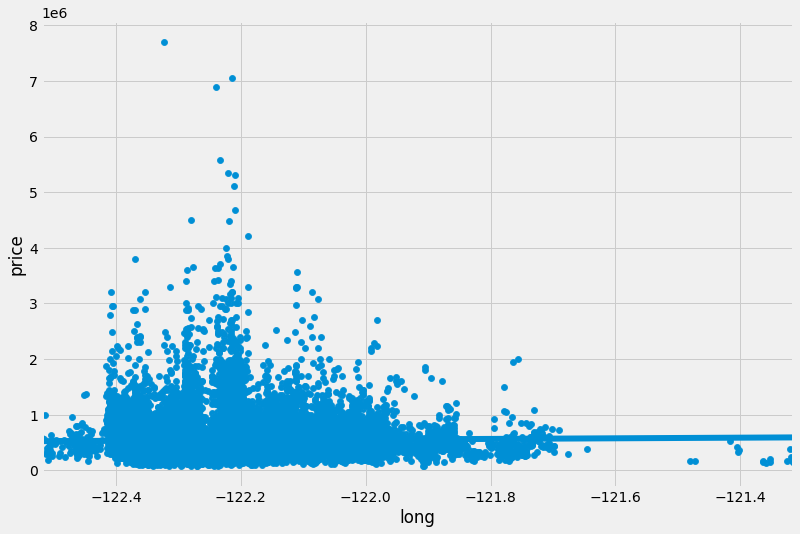

In [61]:
customized_scatterplot(df.price, df.long)

* There is no linear relationship between the price snfd the long.

In [71]:
# Dropping some features
linear_df = df.drop(['yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'price_log'], axis=1)

## Models

In [78]:
# Features and the Target variable
X = linear_df.drop(['price'], axis=1)
y = linear_df['price']

In [82]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = .30, random_state = 0)

In [83]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((15125, 13), (15125,), (6483, 13), (6483,))

### Linear Regression

In [87]:
# Call in the LinearRegression object
lin_reg = LinearRegression(normalize=True, n_jobs=-1)

# Fit train and test data. 
lin_reg.fit(X_train, y_train)

# Predict test data. 
y_pred = lin_reg.predict(X_test)

In [88]:
# Average squared error(MSE) by comparing predicted values with real values. 
print ('%.2f'%mean_squared_error(y_test, y_pred))

54522328565.59


#### Using Cross Validation

In [90]:
lin_reg = LinearRegression()

cv = KFold(shuffle=True, random_state=2, n_splits=10)

scores = cross_val_score(lin_reg, X,y,cv = cv, scoring = 'neg_mean_absolute_error')

In [92]:
print ('%.2f'%scores.mean())

-151637.76


### Quantile Regression

In [ ]:
## Let us do a least square regression on the above dataset 
from sklearn.linear_model import LinearRegression  
model1 = LinearRegression(fit_intercept = True, normalize = False) 
model1.fit(x, y)  
y_pred1 = model1.predict(x)  
print("Mean squared error: {0:.2f}".format(np.mean((y_pred1 - y) ** 2))) 
print('Variance score: {0:.2f}'.format(model1.score(x, y)))  

## Plot the regression 
plt.figure(2) plt.scatter(x, y,  color='black') plt.plot(x, y_pred1, color='blue',linewidth=3)  
plt.xticks(()) 
plt.yticks(()) 
plt.xlabel("x") 
plt.ylabel("y and predicted y") 
plt.title("Linear regression")

In [ ]:
## Quantile regression for the median, 0.5th quantile 
import pandas as pd  
data = pd.DataFrame(data = np.hstack([x_, y_]), columns = ["x", "y"]) print data.head()  
import statsmodels.formula.api as smf   
mod = smf.quantreg('y ~ x', data) res = mod.fit(q=.5) print(res.summary())

In [ ]:
## Build the model for other quantiles 
quantiles = np.arange(0.1,1,0.1) 
print quantiles  
models = [] 
params = []  
for qt in quantiles:  
  print qt  res = mod.fit(q = qt )    
  models.append(res)    
  params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().ix['x'].tolist())   
  params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','cf_lower_bound','cf_upper_bound'])  
print params


### Ridge Regression

In [94]:
## Assiging different sets of alpha values to explore which can be the best fit for the model. 
alpha_ridge = [-3,-2,-1,1e-15, 1e-10, 1e-8,1e-5,1e-4, 1e-3,1e-2,0.5,1,1.5, 2,3,4, 5, 10, 20, 30, 40]
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i, normalize=True)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

In [95]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

0.01: 54506794511.795425
0.001: 54520220358.82566
0.0001: 54522111858.98726
1e-05: 54522306835.71061
1e-08: 54522328543.85007
1e-10: 54522328565.369156
1e-15: 54522328565.58652
0.5: 57143791901.576164
1: 60435275113.71395
1.5: 63618535320.34354
2: 66651288124.38807
3: 72211498793.43794
4: 77097900393.6485
5: 81369625174.08522
10: 96148242177.02353
20: 110097761397.36044
30: 116650490932.03123
40: 120438468645.42365
-1: 160298680506.03415
-3: 311024256968.9556
-2: 396908063559.9411


### Lasso Regression

In [97]:
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = Lasso(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 938088366109482.8, tolerance: 204450814641.53082
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 945670367699219.0, tolerance: 204450814641.53082
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 950710701199339.5, tolerance: 204450814641.53082
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 394424922

In [98]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

3: 54518259506.69061
4: 54518400809.02842
2: 54518860848.17502
5: 54519354003.553696
1.5: 54519455200.6793
1: 54520225483.51656
-2: 54520342026.70794
-3: 54520462673.05347
-1: 54520963990.88561
0.5: 54521120376.37679
1e-15: 54522328565.58652
1e-10: 54522328565.586685
1e-08: 54522328565.603874
1e-05: 54522328582.94536
0.0001: 54522328739.17822
0.001: 54522330301.83778
0.01: 54522345961.51666
10: 54531078954.39044
20: 54588021862.236725
30: 54645747041.855736
40: 54718678760.78727


### Elastic Net Regression

In [100]:
temp_rss = {}
temp_mse = {}
for i in alpha_ridge:
    ## Assigin each model. 
    lasso_reg = ElasticNet(alpha= i, normalize=True)
    ## fit the model. 
    lasso_reg.fit(X_train, y_train)
    ## Predicting the target value based on "Test_x"
    y_pred = lasso_reg.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rss = sum((y_pred-y_test)**2)
    temp_mse[i] = mse
    temp_rss[i] = rss

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4089458083972837.0, tolerance: 204450814641.53082
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4089679046694659.0, tolerance: 204450814641.53082
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4090342201270997.0, tolerance: 204450814641.53082
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 396294

In [101]:
for key, value in sorted(temp_mse.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

1e-15: 54522328565.60221
1e-10: 54522330130.41767
1e-08: 54522441014.836815
1e-05: 54612534861.42078
0.0001: 58838905389.5413
0.001: 90062205430.80583
0.01: 126502763306.24695
0.5: 134343086538.32587
1: 134430394834.29031
1.5: 134459533119.38196
2: 134474108930.20537
3: 134488689189.01581
4: 134495980987.0368
5: 134500356599.88112
10: 134509109027.4989
20: 134513485842.3685
30: 134514944869.71626
40: 134515674400.08951
-3: 134547054741.19539
-2: 134561657267.75015
-1: 134605491609.55444
